In [48]:
import cv2
import os
import glob
import numpy as np
from functions import *
from Patches.crack_patches import *
from Neural_Network.CNN import *
import keras
import pandas as pd

In [3]:
""" Split image patches into training, testing and validation subsets """

input_folder = "rdata"
output = "rdata/" #where you want the split datasets saved. one will be created if it does not exist or none is set
    
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .15, 0.15))

Copying files: 40000 files [03:29, 190.63 files/s]


In [4]:
""" Label train/validation/testing data """

train_dir = 'rdata/train/'
test_dir = 'rdata/test/'
val_dir ='rdata/val/'

"""This part aims to add labels 1 (positive) 0 (negative) in a list"""

train_labels=[]
train_data_inv = []

# Returns two lists: colored 0-255/binary two values, disregarding neg/pos
train_data_inv_pos=  create_data(train_dir, 'positive','Training', 'pre', True) 

for i in range(len(train_data_inv_pos)):
    train_data_inv.append(train_data_inv_pos[i])
    train_labels.append(1)

train_data_inv_neg=  create_data(train_dir, 'negative','Training', 'pre', False)

for i in range(len(train_data_inv_neg)):
    train_data_inv.append(train_data_inv_neg[i])
    train_labels.append(0)

final_train_inv = np.array(train_data_inv).reshape(((len(train_data_inv), 227, 227, 1)))    

print('Shape of Training Data : '+str(final_train_inv.shape))

Working On Training Data: positive

Number of Images Processed: 14000

Working On Training Data: negative

Number of Images Processed: 14000

Shape of Training Data : (28000, 227, 227, 1)


In [5]:
val_labels=[]
val_data_inv = []

val_data_inv_pos=  create_data(val_dir, 'positive','Validation', 'pre', True)


for i in range(0, len(val_data_inv_pos)):
    val_data_inv.append(val_data_inv_pos[i])
    val_labels.append(1)

val_data_inv_neg=  create_data(val_dir, 'negative','Validation', 'pre', False)

for i in range(0, len(val_data_inv_neg)):
    val_data_inv.append(val_data_inv_neg[i])
    val_labels.append(0)

final_val_inv = np.array(val_data_inv).reshape(((len(val_data_inv), 227, 227, 1)))   

print('Shape of Validation Data : '+str(final_val_inv.shape))

Working On Validation Data: positive

Number of Images Processed: 3000

Working On Validation Data: negative

Number of Images Processed: 3000

Shape of Validation Data : (6000, 227, 227, 1)


In [6]:
test_labels=[]
test_data_inv = []

test_data_inv_pos=  create_data(test_dir, 'positive', 'Testing', 'pre')

for i in range(0, len(test_data_inv_pos)):
    test_data_inv.append(test_data_inv_pos[i])
    test_labels.append(1)

test_data_inv_neg=  create_data(test_dir, 'negative', 'Testing', 'pre')

for i in range(0, len(test_data_inv_neg)):
    test_data_inv.append(test_data_inv_neg[i])
    test_labels.append(0)
      
final_test_inv = np.array(test_data_inv).reshape(((len(test_data_inv), 227, 227, 1)))   

print('Shape of Testing Data : '+str(final_test_inv.shape))

Working On Testing Data: positive

Number of Images Processed: 3000

Working On Testing Data: negative

Number of Images Processed: 3000

Shape of Testing Data : (6000, 227, 227, 1)


In [7]:
""" CNN, 2 layers and save classification """

input_shape = (227, 227, 1)
model = create_model(input_shape,3, 3)

batch_size = 2
epochs = 8
final_train_inv = np.asarray(final_train_inv)
train_labels = np.asarray(train_labels)
final_val_inv = np.asarray(final_val_inv)
val_labels = np.asarray(val_labels) #Rotated pos 90


history = model.fit(final_train_inv, train_labels, batch_size=batch_size, epochs=epochs, verbose=2, 
          validation_data=(final_val_inv, val_labels))

Epoch 1/8
14000/14000 - 1033s - loss: 0.4883 - accuracy: 0.9463 - val_loss: 0.0873 - val_accuracy: 0.9663 - 1033s/epoch - 74ms/step
Epoch 2/8
14000/14000 - 1092s - loss: 0.1077 - accuracy: 0.9679 - val_loss: 0.0792 - val_accuracy: 0.9722 - 1092s/epoch - 78ms/step
Epoch 3/8
14000/14000 - 1066s - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.1055 - val_accuracy: 0.9710 - 1066s/epoch - 76ms/step
Epoch 4/8
14000/14000 - 1021s - loss: 0.0564 - accuracy: 0.9844 - val_loss: 0.1059 - val_accuracy: 0.9733 - 1021s/epoch - 73ms/step
Epoch 5/8
14000/14000 - 1115s - loss: 0.0461 - accuracy: 0.9876 - val_loss: 0.0924 - val_accuracy: 0.9783 - 1115s/epoch - 80ms/step
Epoch 6/8
14000/14000 - 1148s - loss: 0.0376 - accuracy: 0.9902 - val_loss: 0.0896 - val_accuracy: 0.9800 - 1148s/epoch - 82ms/step
Epoch 7/8
14000/14000 - 1107s - loss: 0.0421 - accuracy: 0.9900 - val_loss: 0.2866 - val_accuracy: 0.9772 - 1107s/epoch - 79ms/step
Epoch 8/8
14000/14000 - 1103s - loss: 0.0305 - accuracy: 0.9937 - val_loss: 

In [8]:
model.save('working_model.keras') 

In [42]:
model = keras.models.load_model('working_model.keras')

In [58]:
""" Split the testing image into n patches of size 227*227 """

# Define patch size and step size
patch_size = (227, 227)
step_size = (200, 200)

# Load the big image using OpenCV
big_image_path = 'rdata/try.jpg'
big_image = cv2.imread(big_image_path)

# Extract patches
patches = extract_patches(big_image, patch_size, step_size)

In [59]:
# Create a folder to save the patches
output_folder = 'patches_test'
os.makedirs(output_folder, exist_ok=True)

# Save the patches to the folder
for i, patch in enumerate(patches, start=1):
    patch_filename = os.path.join(output_folder, f'{i}.jpg')
    cv2.imwrite(patch_filename, patch)

print(f'{len(patches)} patches saved to {output_folder}.')

Raw Predicted Label(Numeric): 0.0009352905

Predicted Label : No Crack


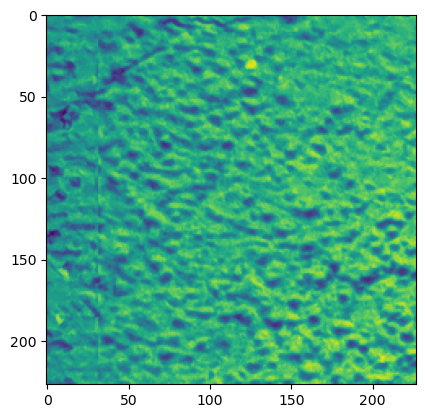

In [4]:
""" How to predict 1 patch """

dire = 'patches_test'  #Directory
predict_image2(dire,'1', model) 

In [43]:
""" Functions for classifcation of a folder of patches """

def create_data3(folder_path, img_file):
    colored_data=[]
    bi_inv_data=[] # Binary inversed - cracks in white
    dir_ =folder_path+'/'+img_file
    image = cv2.imread(dir_, 0) # 0 reads image in grayscale 0-255
    bi_inv, colored_img = process_image2(image) # returns binary inversed image-white cracks +  original image
    colored_data.append(colored_img)
    bi_inv_data.append(bi_inv)   

    return colored_data, bi_inv_data

def process_image2(image):
    ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV) #ret is the threshold (127), any above 127 is set to 255
    return bi_inv, image


def predict_image_util(final_pred_inv):
    img_test = (final_pred_inv[0].reshape((1, 227, 227, 1)))  
    raw_predicted_label = model.predict(img_test, batch_size=None, verbose=0, steps=None)[0][0]
    
    predicted_label=1;    
    if(raw_predicted_label<0.8):
        predicted_label=0
        
    predicted_label_str='Crack'    
    if(predicted_label==0):
        predicted_label_str='No Crack'
        
    print('Raw Predicted Label(Numeric): '+str(raw_predicted_label))
    print('\nPredicted Label : '+predicted_label_str)    
    return raw_predicted_label, predicted_label_str

def predict_folder(folder_path):
    image_names = []
    raw_predictions = []
    image_classifications = []

    for img_file in os.listdir(folder_path):
        if img_file.endswith('.jpg'):
            img_path = os.path.join(folder_path, img_file)
            image_names.append(img_file)

            # Assuming `predict_image_util()` takes an image as input and returns raw_pred and img_classification
            pred_data_colr_, pred_data_inv_ = create_data3(folder_path,img_file)
            pred_data_inv = []
            pred_data_inv.append(pred_data_inv_[0])
            final_pred_inv = np.array(pred_data_inv).reshape(((len(pred_data_inv), 227, 227, 1)))
            raw_pred, img_classification = predict_image_util(final_pred_inv)
            raw_predictions.append(raw_pred)
            image_classifications.append(img_classification)

    # Create a pandas DataFrame with the collected data
    data = {
        'Image Name': image_names,
        'Raw Label Prediction': raw_predictions,
        'Image Classification': image_classifications
    }

    df = pd.DataFrame(data)
    return df

In [17]:
""" Predict folder of patches """

# Example usage
folder_path = 'patches_test/'

result_dataframe1 = predict_folder(folder_path)
result_dataframe1.head()

Raw Predicted Label(Numeric): 0.0009352905

Predicted Label : No Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 0.99999976

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 9.885774e-13

Predicted Label : No Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numer

Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 0.9999943

Predicted Label : Crack
Raw Predicted Label(Numeric): 0.9998371

Predicted Label : Crack
Raw Predicted Label(Numeric): 0.9799555

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted Label(Numeric): 4.1548405e-12

Predicted Label : No Crack
Raw Predicted Label(Numeric): 0.9709458

Predicted Label : Crack
Raw Predicted Label(Numeric): 0.9999999

Predicted Label : Crack
Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack
Raw Predicted

,Image Name,Raw Label Prediction,Image Classification
0,1.jpg,0.000935,No Crack
1,10.jpg,1.000000,Crack
2,100.jpg,1.000000,Crack
3,101.jpg,1.000000,Crack
4,102.jpg,1.000000,Crack


In [60]:
# Path to the directory containing the patch images
patch_directory = 'patches_test/'

# Iterate through the DataFrame and mark patches with the label "Crack"
for index, row in result_dataframe1.iterrows():
    patch_path = os.path.join(patch_directory, row['Image Name'])
    label = row['Image Classification']
    
    if label == 'Crack':
        # Load the patch image
        patch = cv2.imread(patch_path)
        
        # Define mark color (e.g., red)
        mark_color = (0, 0, 255)
        
        # Calculate a smaller line thickness (half the current size)
        line_thickness = min(patch.shape[:2]) // 40
        
        # Draw an "X" mark on the patch with smaller thickness
        patch_marked = patch.copy()
        height, width, _ = patch.shape
        cv2.line(patch_marked, (0, 0), (width - 1, height - 1), mark_color, thickness=line_thickness)
        cv2.line(patch_marked, (0, height - 1), (width - 1, 0), mark_color, thickness=line_thickness)
        
        # Save the marked patch with a new filename
        marked_patch_filename = f"{row['Image Name']}"
        marked_patch_path = os.path.join(patch_directory, marked_patch_filename)
        cv2.imwrite(marked_patch_path, patch_marked)

print("Smaller marks added to patches with the 'Crack' label.")


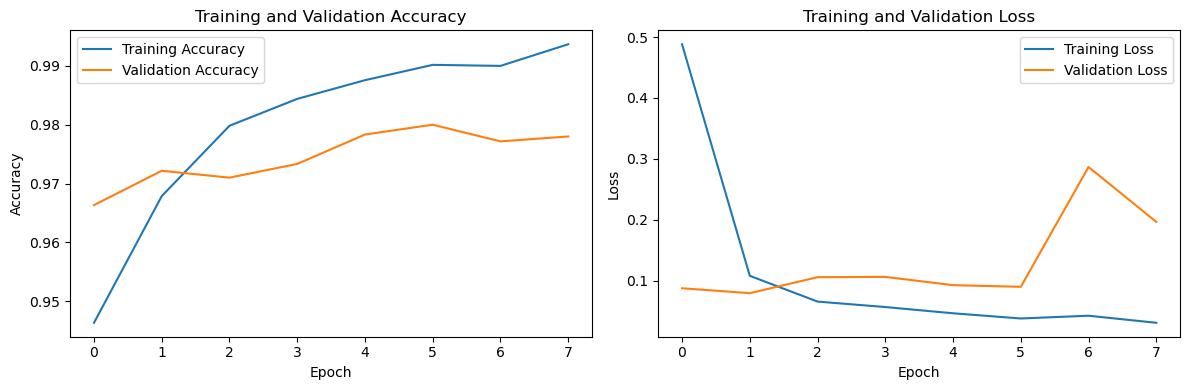

In [12]:
# Plotting the training and validation curves
plot_training_curves(history.history)

In [13]:
# model accuracy
#final_test_inv = final_val_inv
#test_labels = val_labels

final_test_inv = np.asarray(final_test_inv)
test_labels = np.asarray(test_labels)

score = model.evaluate(final_test_inv, test_labels)
print('Final Accuracy : ', score[1]*100, "%" )
print('Final Loss : ', score[0])

188/188 [==============================] - 24s 126ms/step - loss: 0.2328 - accuracy: 0.9750
Final Accuracy :  97.50000238418579 %
Final Loss :  0.23275405168533325


In [61]:
""" Reconstructing the image after marking the patches, remember to remove the unmarked patches """

# Load the image and the patches

image_path = 'rdata/try.jpg'
image = cv2.imread(image_path)
patches = [cv2.imread(file) for file in glob.glob('patches_test/*.jpg')]

# Define patch size and step size
patch_size = (227, 227)  # Size of the patches
step_size = (200, 200)    # Step size for extracting patches

# Extract patches from the image
patches = extract_patches(image, patch_size, step_size)

patches = [cv2.imread(file) for file in glob.glob('patches_test/*.jpg')]

# Reconstruct the image from patches
reconstructed_image = reconstruct_image(patches, image.shape, patch_size, step_size)
output_path = 'rdata/reconstructed_image1.jpg'

cv2.imshow('Reconstructed image', reconstructed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite(output_path, reconstructed_image)
